<a href="https://www.kaggle.com/code/milinchakraborty/bank-customer-churn-modelling?scriptVersionId=180175250" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-size:250%;text-align:center;font-family:timesnewroman;background:SlateGray">BANK CUSTOMER CHURN MODELLING (OPTUNA+(RFC, GBC, XGBC, LGBMC)+VOTING</h1>


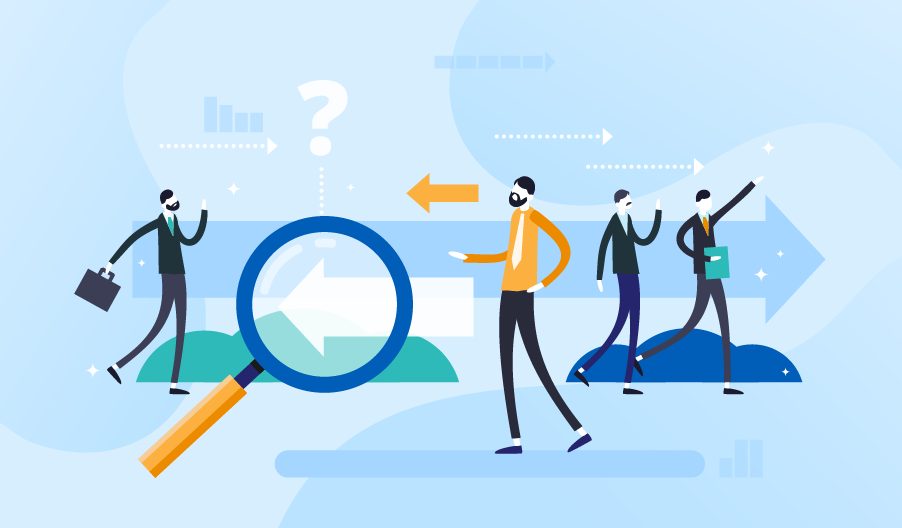

**Bank customer churn**, also known as customer attrition, refers to the phenomenon where customers stop doing business with a bank or switch to another bank. Churn is a critical metric for banks as it directly impacts their customer base and revenue. Customer churn can occur due to various reasons, such as dissatisfaction with services, better offers from competitors, changes in financial needs, or poor customer experiences.

We start with importing the necessary packages.

In [1]:
#Importing necessary packages to work with.

import numpy as np #for mathematical computations with data structures.
import pandas as pd #for working with dataframes.
import seaborn as sns #for graphical visualization.
import matplotlib.pyplot as plt #for graphical visualization.
from sklearn.model_selection import train_test_split #for splitting data into train and test sets.
from sklearn import metrics #for calculating performance metrics.
from sklearn.ensemble import RandomForestClassifier #for modelling with RF Classifier.
from sklearn.ensemble import GradientBoostingClassifier #for modelling with GB Classifier.
from xgboost.sklearn import XGBClassifier #for modelling with XGB Classifier.
from lightgbm import LGBMClassifier #for modelling with LGBM Classifier.
from sklearn.ensemble import StackingClassifier #Importing Stacking Classifier.
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression for the stacking classifier.
from sklearn.ensemble import VotingClassifier #Importing VotingClassifier.
import optuna #for hyperparameter tuning using Optuna.
optuna.logging.set_verbosity(optuna.logging.WARNING) #Silencing trial results.
from plotly.offline import init_notebook_mode, iplot #for plotting offline graphs using plotly.
init_notebook_mode(connected=True)
import warnings 
warnings.filterwarnings("ignore") #for ignoring deprecation warning.
from imblearn.over_sampling import RandomOverSampler#for Random oversampling.
from imblearn.over_sampling import SVMSMOTE#for SVM SMOTE.
from imblearn.over_sampling import ADASYN# for generating synthetic data using ADASYN.
from imblearn.over_sampling import KMeansSMOTE #applies a KMeans clustering before to over-sample using SMOTE.
from sklearn.preprocessing import StandardScaler #for scaling data.
from imblearn.over_sampling import BorderlineSMOTE #for resampling using BorderLine SMOTE technique.
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, PrecisionRecallCurve #for getting various classification metrics.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


# <code style="background:SlateGray;font-family:timesnewroman;color:white">--------------------------------------------------------------1. Exploratory Data Analysis-------------------------------------------------------------------</code>

### 🗃️ Reading the data:

In [2]:
#Reading the csv file and saving into a pandas dataframe.
df=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [3]:
#Looking at the first 20 rows of the table.
df.head(20)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         13    15632264        Kay          476    France  Female   34   
13         14    15691483       Chin          549    France  Female   25   
14         15    15600882      Scott          635     Spain  Female   35   
15         16    15643966    Goforth          616   Germany    Male   45   
16         17    15737452      Romeo          653   Germany    Male   58   
17         18    15788218  Henderson          549     Spain  Female   24   
18         19    15661507    Muldrow          587     Spain    Male   45   
19         20    15568982        Hao          726    France  Female   24   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
1        1   83807.86              1          0               1   
2        8  159660.80              3          1               0   
3        1       0.00              2          0               0   
4        2  125510.82              1          1               1   
5        8  113755.78              2          1               0   
6        7       0.00              2          1               1   
7        4  115046.74              4          1               0   
8        4  142051.07              2          0               1   
9        2  134603.88              1          1               1   
10       6  102016.72              2          0               0   
11       3       0.00              2          1               0   
12      10       0.00              2          1               0   
13       5       0.00              2          0               0   
14       7       0.00              2          1               1   
15       3  143129.41              2          0               1   
16       1  132602.88              1          1               0   
17       9       0.00              2          1               1   
18       6       0.00              1          0               0   
19       6       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0  
15         64327.26       0  
16          5097.67       1  
17         14406.41       0  
18        158684.81       0  
19         54724.03       0

In [4]:
#Getting datatypes of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 👀 Features:
* **CustomerId** is the customer ID, which is a unique identifier for each customer.
* **Surname** is the customer's surname. 
* **CreditScore** is the customer's credit score, which is used to assess the customer's ability to repay debt. 
* **Geography** is the geographic region where the customer lives. 
* **Gender** is the customer's gender. 
* **Age** is the customer's age. 
* **Tenure** is the length of time the customer has been using the bank's services. 
* **Balance** is the customer's account balance. 
* **NumOfProducts** is the number of products the customer is using. 
* **HasCrCard** is the information on whether the customer has a credit card. 
* **IsActiveMember** is the information on whether the customer is an active member of the bank. 
* **EstimatedSalary** is the customer's estimated salary. 
* **Exited** is a binary variable indicating whether the customer has left the bank.

There seem to be no missing values in the dataset. Hence, we proceed without cleaning the data.

We now use graphs to visualize various dependencies among the features.

### 📊 Graphical Visualization:

In [5]:
#Getting a subset of the original dataframe with only numeric independent variables.
cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df1=df[cols]

<Axes: >

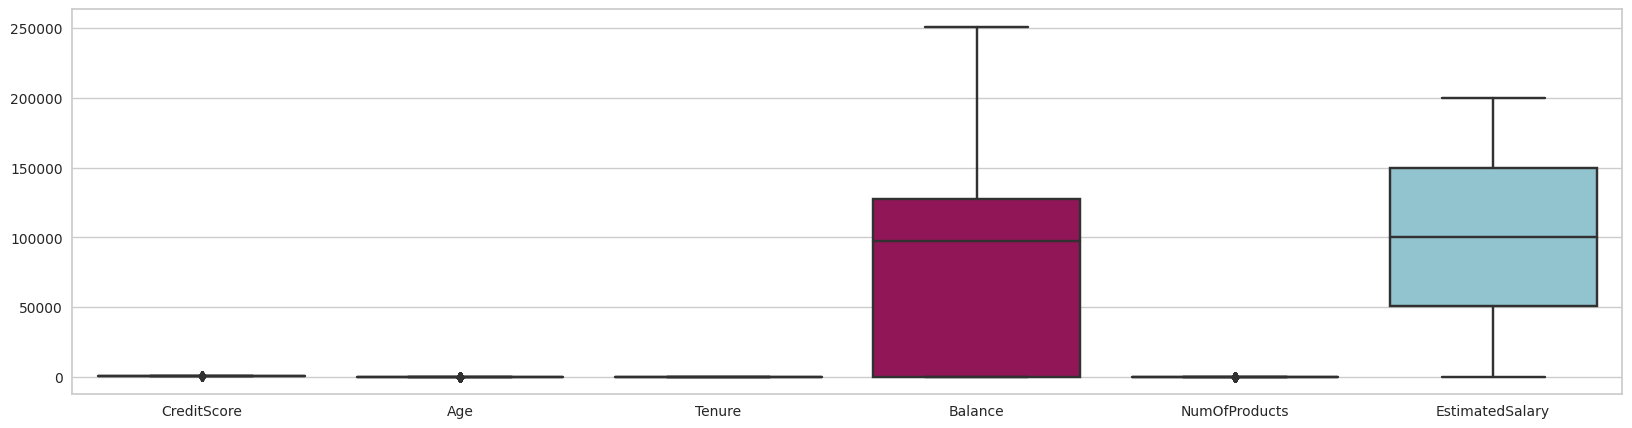

In [6]:
#Plotting the independent variables against their counts to check for outliers. We can change the "ylim()" values to zoom in the boxes.
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 5))
#plt.ylim()
sns.boxplot(data=df1)

In [7]:
# Function to calculate percentage of values for each column that lies outside the interquartile range.
def percent_outliers(data):
    outl=0
    i =0
    q1, q3 = np.percentile(data,[25, 75])
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for i in range (data.size):
        if data[i]>ul or  data[i]<ll:
            outl=outl+1
    return outl*100/(data.size)

<Axes: title={'center': 'Percentage Outliers for each Numerical Independent Variable'}>

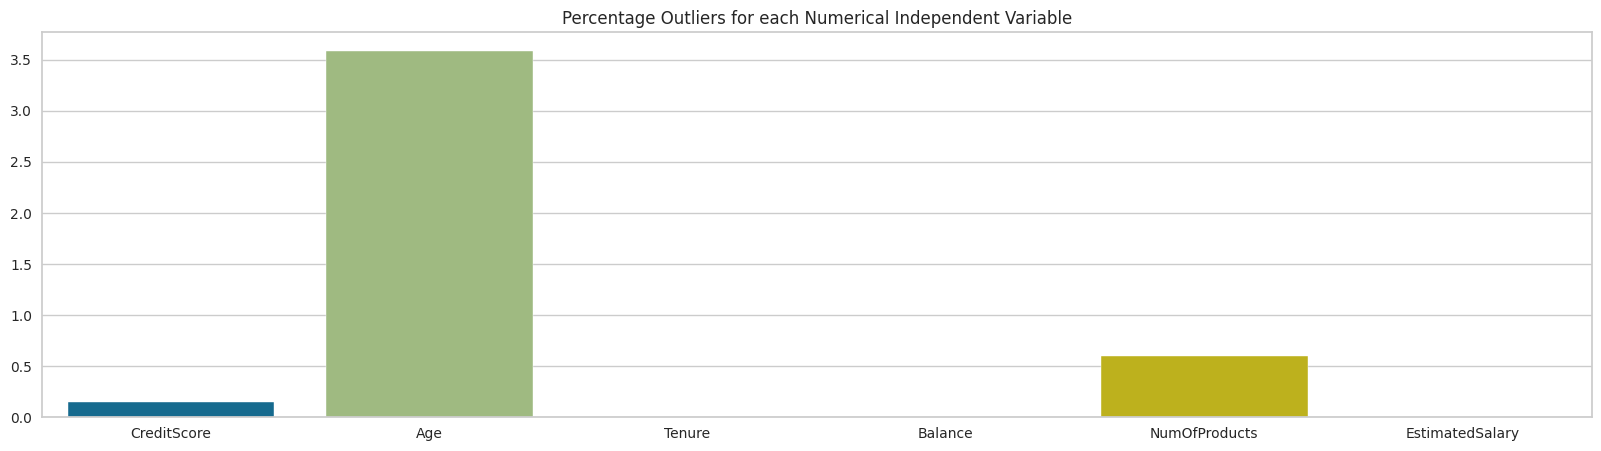

In [8]:
# Checking outlier percentages for each independent variables.
x=[]
y=[]
i =0
for col in df1.columns:
    #print("\n Percentage outliers for column ", col, ": ", percent_outliers(df2[col]))  
    x.append(col)
    y.append(percent_outliers(df1[col]))
fig, ax = plt.subplots(figsize=(20, 5))
plt.title("Percentage Outliers for each Numerical Independent Variable")
sns.barplot(x=x,y=y)

The 'Age' variable has the highest percentage of outliers. However, it is only around 3.6%.

Text(0.5, 1.0, 'Estimated Salary Distribution- Grouped by Excited')

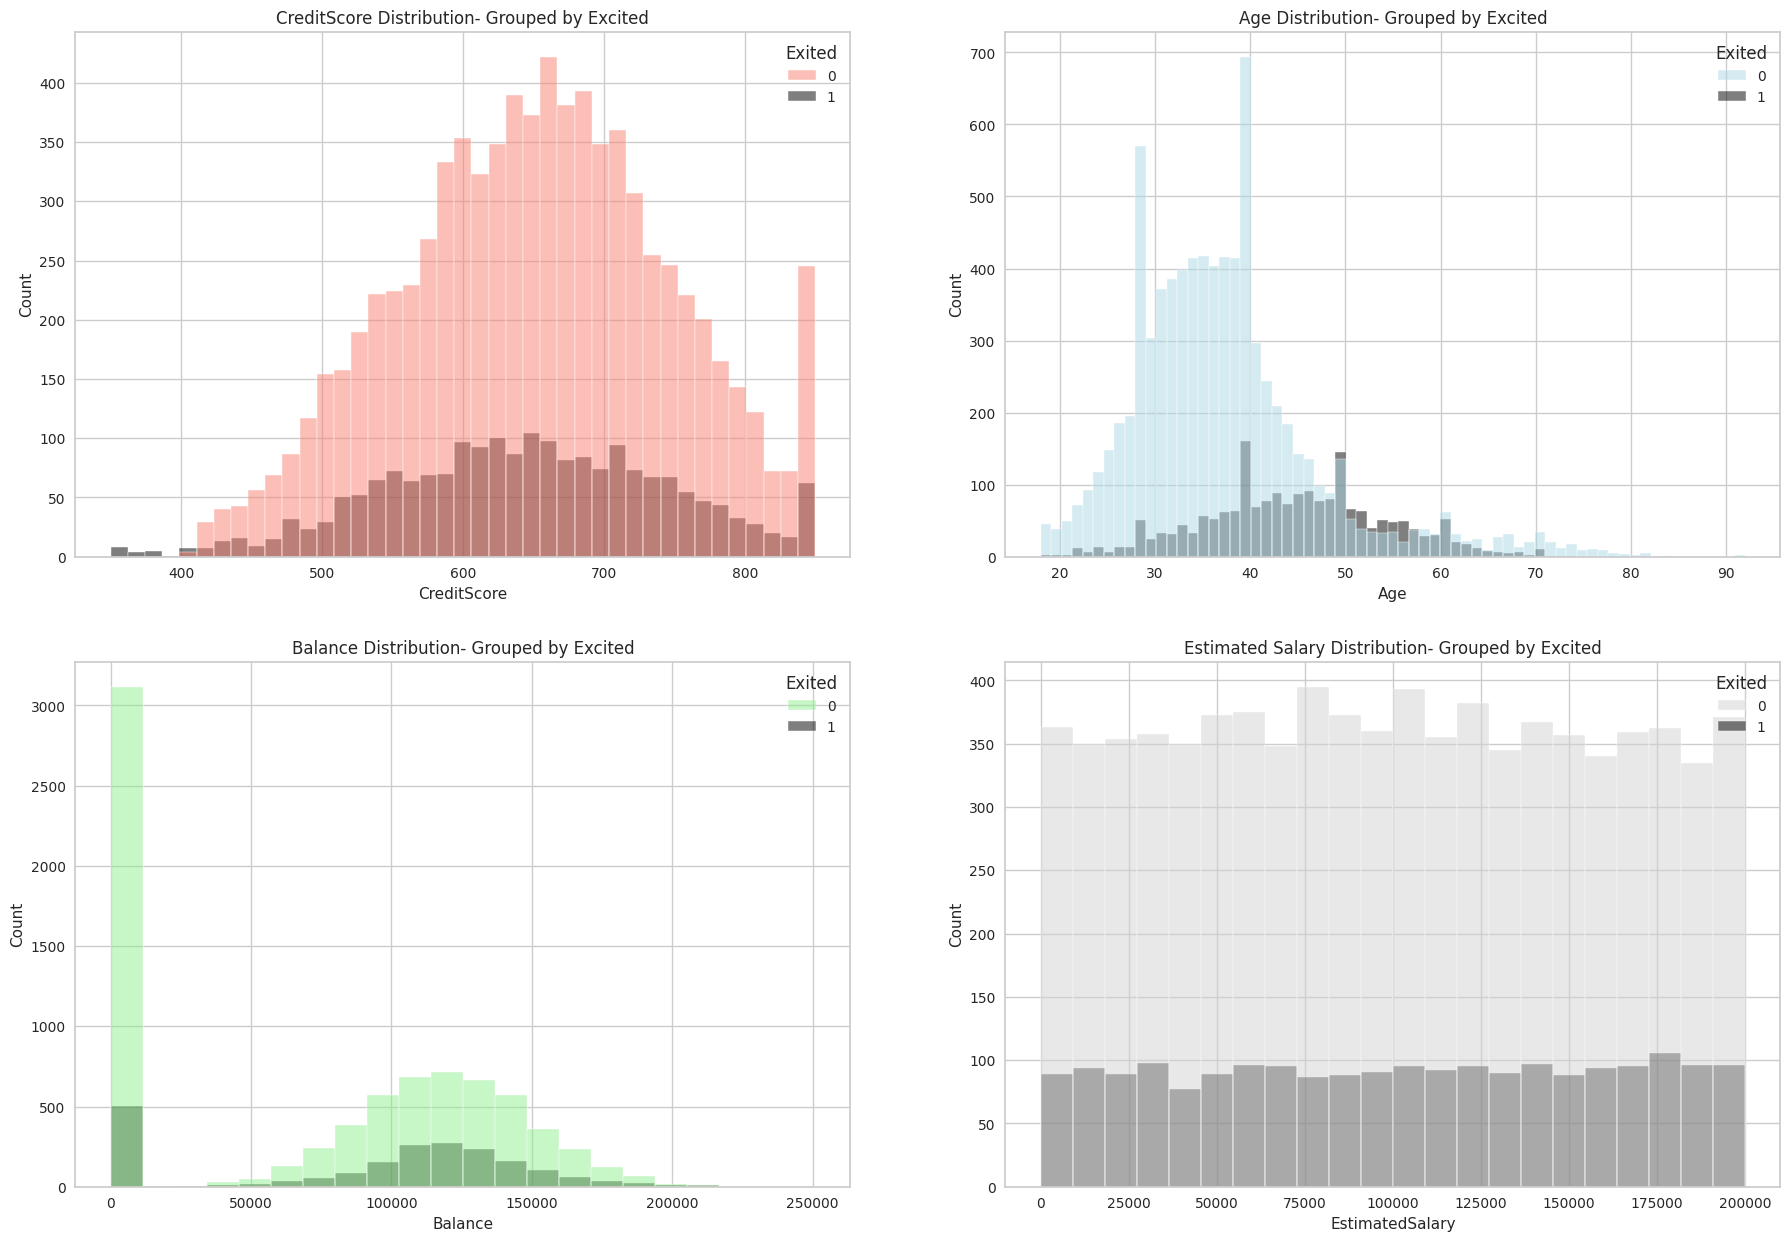

In [9]:
#Distributions of numerical variables grouped by target variable; histograms.
fig, axes = plt.subplots(2, 2, figsize=(22, 15))
sns.set_style('dark')

sns.histplot(ax=axes[0][0], data=df, x="CreditScore", hue = 'Exited', palette=['salmon', 'black'])
axes[0][0].set_title("CreditScore Distribution- Grouped by Excited")

sns.histplot(ax=axes[0][1], data=df, x="Age", hue = 'Exited', palette=['lightblue', 'black'])
axes[0][1].set_title("Age Distribution- Grouped by Excited")

sns.histplot(ax=axes[1][0], data=df, x="Balance", hue = 'Exited', palette=['lightgreen', 'black'])
axes[1][0].set_title("Balance Distribution- Grouped by Excited")

sns.histplot(ax=axes[1][1], data=df, x="EstimatedSalary", hue = 'Exited', palette=['lightgrey', 'black'])
axes[1][1].set_title("Estimated Salary Distribution- Grouped by Excited")

Text(0.5, 1.0, 'Balance vs Age- Grouped by Geography')

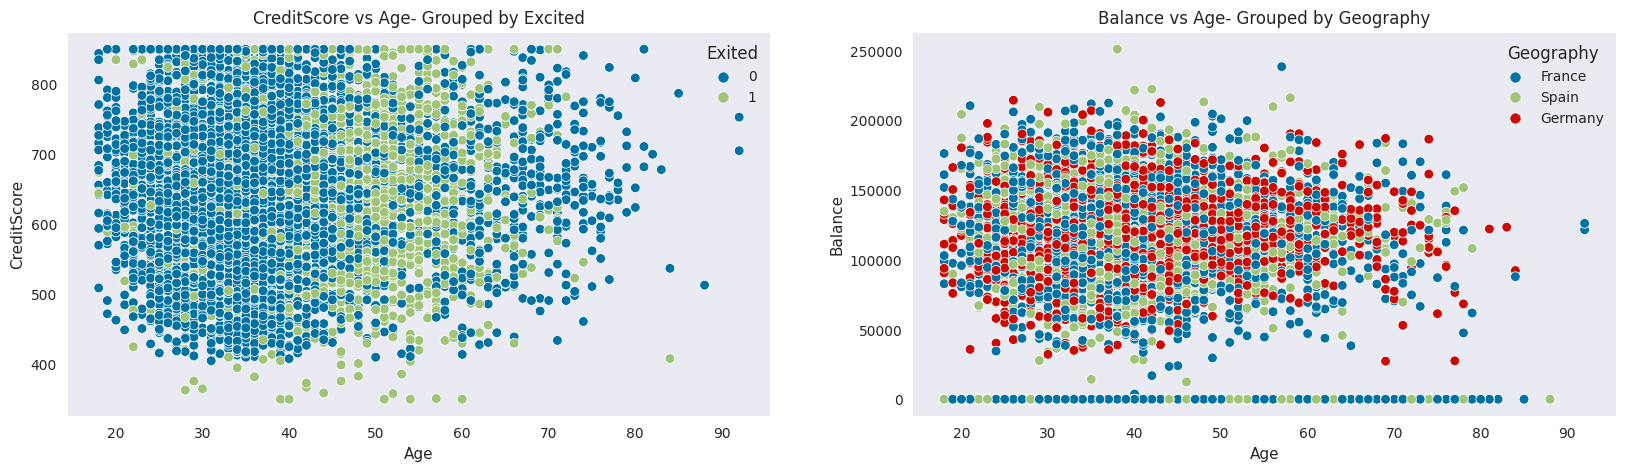

In [10]:
#Scatterplots.
fig, axes = plt.subplots(1, 2, figsize=(20, 5))


sns.scatterplot(ax=axes[0], x='Age', y= 'CreditScore', hue = 'Exited', data = df)
axes[0].set_title("CreditScore vs Age- Grouped by Excited")

sns.scatterplot(ax=axes[1], x='Age', y= 'Balance', hue = 'Geography', data = df)
axes[1].set_title("Balance vs Age- Grouped by Geography")

Text(0.5, 1.0, 'Tenure Distribution- Grouped by Excited')

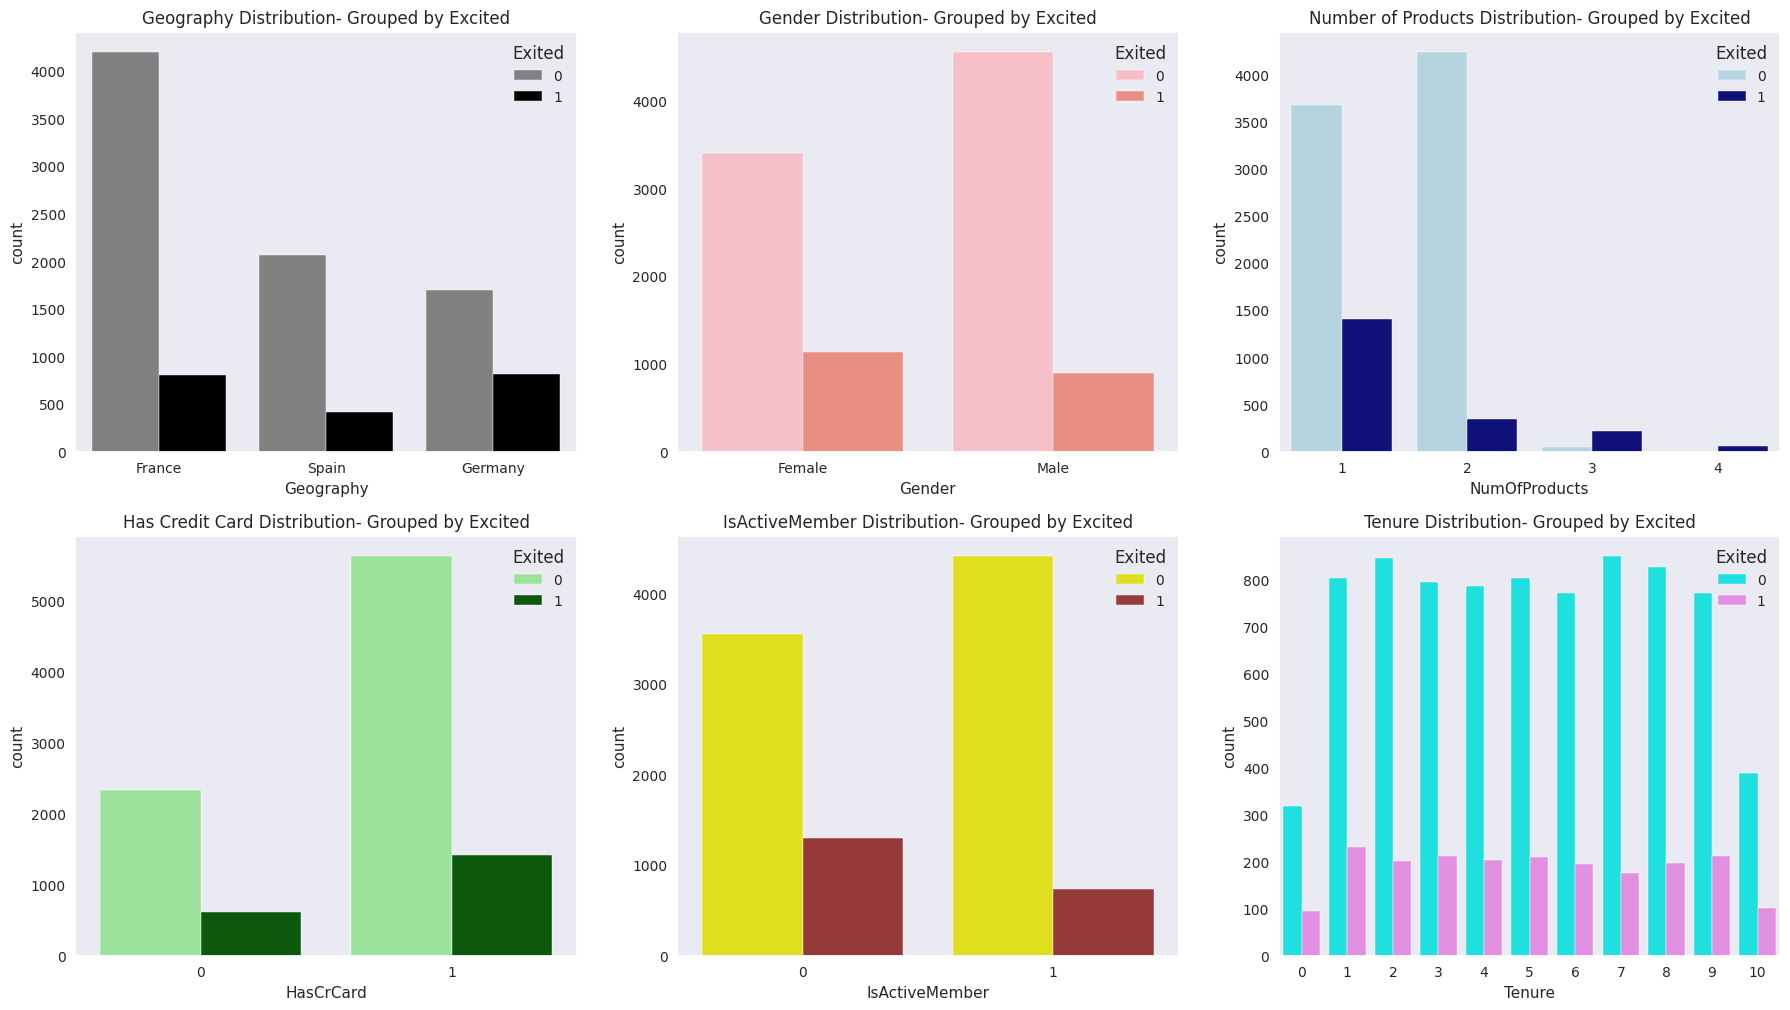

In [11]:
#Distributions of categorical variables grouped by target variable; countplots.
fig, axes = plt.subplots(2, 3, figsize=(22, 12))

sns.countplot(ax=axes[0][0], x ='Geography', hue = 'Exited', data = df, palette=['grey', 'black'])
axes[0][0].set_title("Geography Distribution- Grouped by Excited")

sns.countplot(ax=axes[0][1], x ='Gender',hue = 'Exited', data = df, palette=['lightpink', 'salmon'])
axes[0][1].set_title("Gender Distribution- Grouped by Excited")

sns.countplot(ax=axes[0][2], x ='NumOfProducts',hue = 'Exited', data = df, palette=['lightblue', 'darkblue'])	
axes[0][2].set_title("Number of Products Distribution- Grouped by Excited")

sns.countplot(ax=axes[1][0], x ='HasCrCard',hue = 'Exited', data = df, palette=['lightgreen', 'darkgreen'])	
axes[1][0].set_title("Has Credit Card Distribution- Grouped by Excited")

sns.countplot(ax=axes[1][1], x ='IsActiveMember',hue = 'Exited', data = df, palette=['yellow', 'brown'])	
axes[1][1].set_title("IsActiveMember Distribution- Grouped by Excited")

sns.countplot(ax=axes[1][2], x ='Tenure',hue = 'Exited', data = df, palette=['cyan', 'violet'])	
axes[1][2].set_title("Tenure Distribution- Grouped by Excited")

#Do percentages.

We now dummy-encode the categorical features, and drop the first column.

### Data Preprocessing:

In [12]:
#Dummy-encoding categorical columns.
df=pd.get_dummies(df, prefix=['Geo', 'Gender'], columns=['Geography', 'Gender'], drop_first=True)

In [13]:
#Getting all the column names.
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geo_Germany', 'Geo_Spain', 'Gender_Male'],
      dtype='object')

The features 'RowNumber', 'CustomerId', 'Surname' are different for each entry and they are not supposed to have any relationship with the target variable, hence we drop them. By plotting the correlation heatmap, we can understand how the target variable is significantly correlated with various features, if at all.

<Axes: >

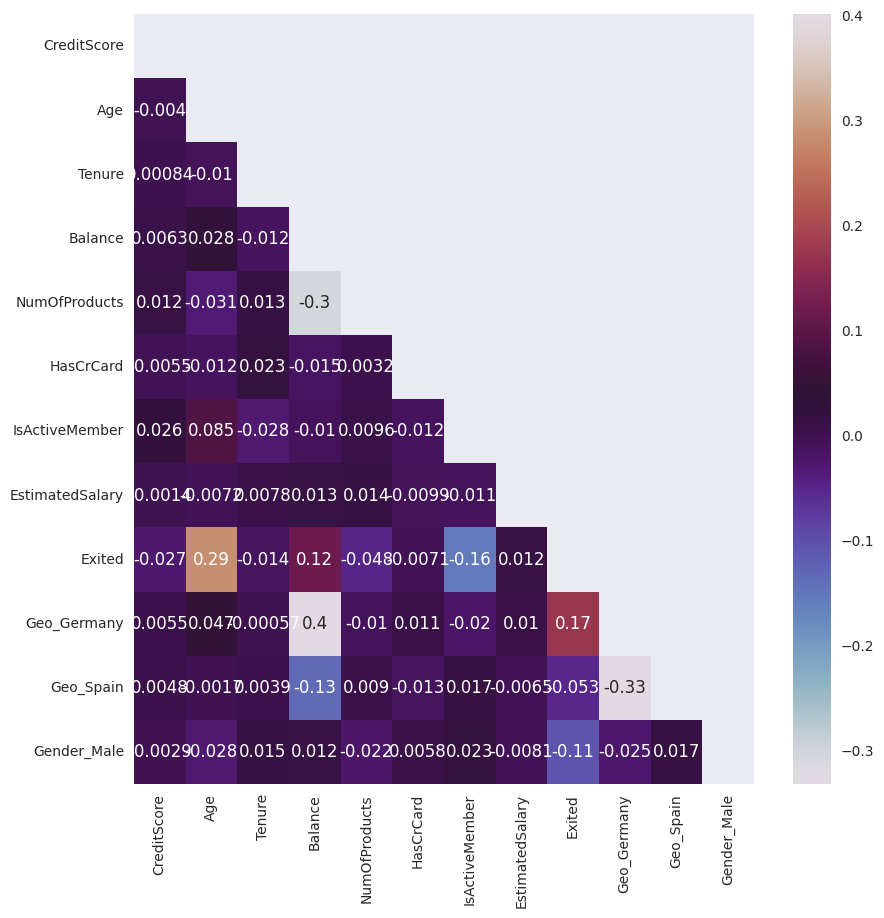

In [14]:
#Dropping 'RowNumber', 'CustomerId', 'Surname' categories and plotting correlation heatmap for the remaining variables.
df1=df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

corre=df1.corr()
matrix = np.triu(corre)

plt.figure(figsize=(10,10))
sns.heatmap(corre,annot=True, mask=matrix, cmap='twilight')

'Age' seems to be very mildly correlated with the target variable 'Exited'.

# <code style="background:SlateGray;font-family:timesnewroman;color:white">-----------------------------------------------------------------2. Statistical Modelling-----------------------------------------------------------------------</code>

### Creating Train and Test sets.
<hr style="height:1px;border-top:1px solid #f00" />

We now separate the data into x and y sets, for relevant independent features and the target variable.

In [15]:
#Creating an array containing names of all the independent variables.
i_variables=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geo_Germany', 'Geo_Spain', 'Gender_Male']

In [16]:
#Setting x as all the independent variable rows.
x=df[i_variables]

In [17]:
#Setting y as the target variable.
y = df['Exited']

We now split the data into train and test sets.

In [18]:
#Splitting x and y into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

We create an empty list 'Models' to keep track of accuracy of each model for the training and testing datasets.

In [19]:
#Creating lists to record performance of each model on training and test data.
model_name=[]
train_acc=[]
test_acc=[]
precision=[]
recall=[]
f1=[]

### Finding Best Parameters for RandomForestClassifier using Optuna.
<hr style="height:1px;border-top:1px solid #f00" />

An objective function is defined which accepts the training data and number of trials. We start with defining a range for different parameters of a RandomForest Classifier. The training set which is passed as argumets is further split into training and validation datasets to record performance of each combination od parameters for RFC. We set Accuracy as the deciding metric.

A study object is created using the 'create_study' method of optuna, in a direction to maximize the accuracy metric.

The parameters for the trial having the best accuracy are stored in a list.

The RFC model is built using parameters from the best trial and the actual data is fit, and the accuracy score of the test data is printed and saved into the Models dataframe.

Number of finished trials: 30
Best trial: {'n_estimators': 788, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3}
Test Accuracy of RFC model:0.8572


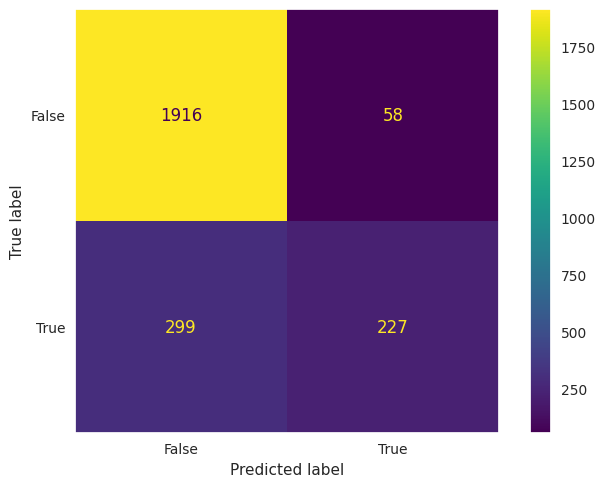

In [20]:
#Using Optuna for hyperparameter tuning for a RandomForestClassifier.
def objective0(trial,data=x_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15)
    param = {'n_estimators' : trial.suggest_int("n_estimators", 700, 1000, log=True),
            'max_depth': trial.suggest_categorical('max_depth', [13,15,17,19]),
            'min_samples_split' : trial.suggest_int("min_samples_split", 2, 10),
            'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 10)
                                                   }                                   
                                               
    model0 =RandomForestClassifier(**param)    
    model0.fit(train_x,train_y)    
    preds = model0.predict(test_x)    
    acc = metrics.accuracy_score(test_y, preds)
    
    return acc        

study0 = optuna.create_study(direction='maximize')
study0.optimize(objective0, n_trials=30)
print('Number of finished trials:', len(study0.trials))
print('Best trial:', study0.best_trial.params)

Best_trial0 = study0.best_trial.params
Best_trial0

model0 =RandomForestClassifier(**Best_trial0)
model0.fit(x_train, y_train)
preds = model0.predict(x_test)    
acc = metrics.accuracy_score(y_test, preds)    
print(f'Test Accuracy of RFC model:{acc}')

#Appending lists.
model_name.append('RandomForestClassifier')
train_acc.append(metrics.accuracy_score(y_train, model0.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))

#Plotting the confusion matrix.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True])
cm_display.plot()
plt.show()

We now look at each trial of the study object.

In [21]:
#Dataframe of each trial and it's accuracy; Looking at the first five rows.
study0.trials_dataframe().head(5)

number     value             datetime_start          datetime_complete  \
0       0  0.864000 2024-05-28 03:39:31.882564 2024-05-28 03:39:38.252438   
1       1  0.872889 2024-05-28 03:39:38.252682 2024-05-28 03:39:45.221460   
2       2  0.867556 2024-05-28 03:39:45.221685 2024-05-28 03:39:53.556520   
3       3  0.870222 2024-05-28 03:39:53.556747 2024-05-28 03:39:59.660153   
4       4  0.872000 2024-05-28 03:39:59.660398 2024-05-28 03:40:06.140991   

                duration  params_max_depth  params_min_samples_leaf  \
0 0 days 00:00:06.369874                15                        1   
1 0 days 00:00:06.968778                19                        6   
2 0 days 00:00:08.334835                17                        3   
3 0 days 00:00:06.103406                13                        9   
4 0 days 00:00:06.480593                13                        9   

   params_min_samples_split  params_n_estimators     state  
0                         3                  728  COMPLETE  
1                         8                  878  COMPLETE  
2                         6                  991  COMPLETE  
3                         7                  793  COMPLETE  
4                         7                  851  COMPLETE

The Optimization History Plot shows the plot of the objective value (here accuracy metric) vs trial. The best value is chosen and is marked with a red line.

<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

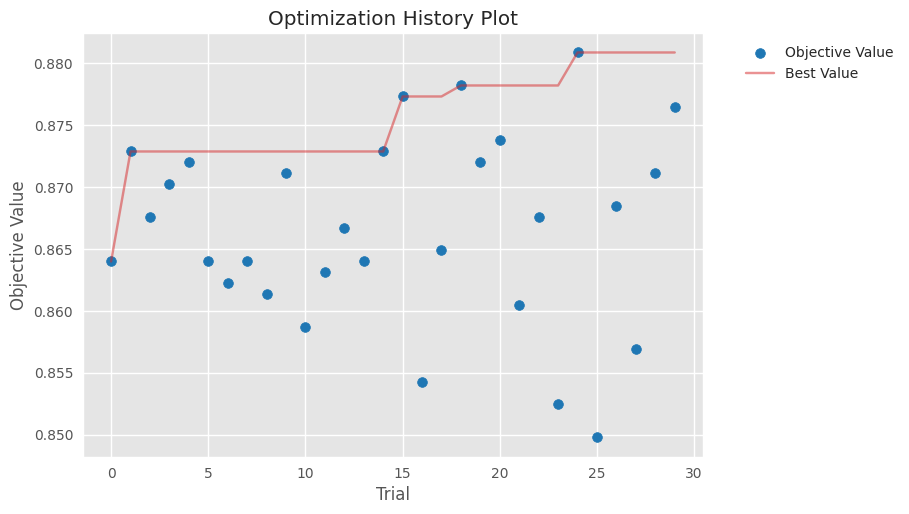

In [22]:
#Plotting optimization history of all trials in study0.
optuna.visualization.matplotlib.plot_optimization_history(study0)

Probably greater number of trials would have produced a smoother red curve.

Next, we look at the parameter combinations for each trial. darker lines correspond to higher accuracy (objective) values.

In [23]:
#Plotting the high-dimensional parameter relationships in study0.
optuna.visualization.plot_parallel_coordinate(study0)

Slice Plot shows the progression of hyperparameters with each trial, and the corresponding value of the objective function. The darker points indicate later trial. This appears as a three dimensional plot.

In [24]:
#plot_slice: shows the evolution of the search. You can see where in the hyperparameter space the search went and which parts of the space were explored more.
optuna.visualization.plot_slice(study0)

The Contour Plot is again a three-dimensional kind of plot, with the third dimension of color representing the accuracy. Depending on the extent of impact of a parameter on the overall performance of the model, two or more parameters can be correlated. Contour plot explores this behaviour among the hyperparameters.

In [25]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study0, params=['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'])

The following plot shows the relative parameter importance for each hyperparameter, depending on the extent of impact the parameter has on the accuracy score of the model.

In [26]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study0)

The number of estimators seems to be the most important parameter.

The empirical distribution function (EDF) is the “data analogue” of cdf of a random variable; Here the indicator is the probability of getting an accuracy value (x). EDF is useful to analyze and improve search spaces. An empirical distribution function provides a way to model and sample cumulative probabilities for a data sample that does not fit a standard probability distribution.

In [27]:
#Visualize empirical distribution function.
optuna.visualization.plot_edf(study0)

### Finding Best Parameters for EXtremeGradientBoostingClassifier using Optuna.
<hr style="height:1px;border-top:1px solid #f00" />

A new objective function is defined to find best parameters for an XGB Classifier. The rest of the steps are identical to the model before.

Number of finished trials: 30
Best trial: {'lambda': 0.01771583966313419, 'alpha': 0.15446649300046397, 'learning_rate': 0.014, 'gamma': 0, 'max_depth': 13, 'min_child_weight': 2, 'colsample_bytree': 0.7, 'subsample': 0.7}
Test Accuracy of XGBC model:0.844


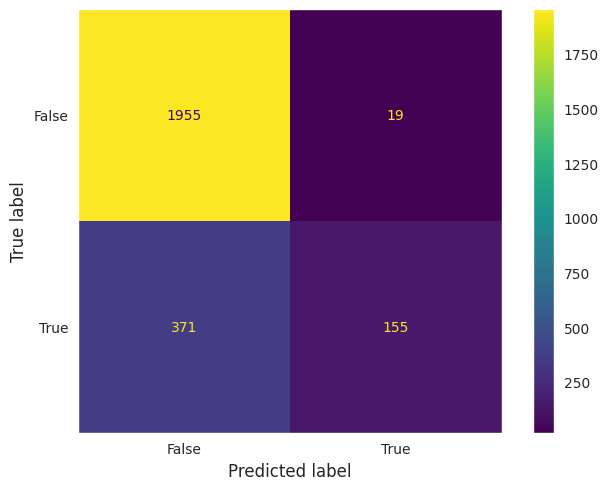

In [28]:
#Using Optuna for hyperparameter tuning for an XGBClassifier.
def objective1(trial,data=x_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15)
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0,log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0,log=True),        
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'gamma':trial.suggest_int('gamma', 0,1),
    
        
        'n_estimators': 10000,
        "objective": 'binary:logistic',
        "grow_policy": 'depthwise',
        
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9]),#can extend upto 1.0
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,0.9])
    }
    model1 =XGBClassifier(**param)    
    model1.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)    
    preds = model1.predict(test_x)    
    acc = metrics.accuracy_score(test_y, preds)
    
    return acc

study1 = optuna.create_study(direction='maximize')
study1.optimize(objective1, n_trials=30)
print('Number of finished trials:', len(study1.trials))
print('Best trial:', study1.best_trial.params)

Best_trial1 = study1.best_trial.params
Best_trial1["tree_method"]= 'hist'
Best_trial1


model1 =XGBClassifier(**Best_trial1)
model1.fit(x_train, y_train,  verbose=False)


preds = model1.predict(x_test)    
acc = metrics.accuracy_score(y_test, preds)    
print(f'Test Accuracy of XGBC model:{acc}')

model_name.append('XGBClassifier')
train_acc.append(metrics.accuracy_score(y_train, model1.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))

#Plotting the confusion matrix.
sns.set_style('dark')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True])
cm_display.plot()
plt.show()


In [29]:
#Dataframe of each trial and it's accuracy; Looking at the first 5 rows.
study1.trials_dataframe().head(5)

number     value             datetime_start          datetime_complete  \
0       0  0.846222 2024-05-28 03:43:04.541051 2024-05-28 03:43:05.363155   
1       1  0.847111 2024-05-28 03:43:05.363610 2024-05-28 03:43:06.292397   
2       2  0.847111 2024-05-28 03:43:06.292750 2024-05-28 03:43:07.976828   
3       3  0.840000 2024-05-28 03:43:07.977222 2024-05-28 03:43:09.548317   
4       4  0.809778 2024-05-28 03:43:09.548656 2024-05-28 03:43:09.979740   

                duration  params_alpha  params_colsample_bytree  params_gamma  \
0 0 days 00:00:00.822104      0.238004                      0.7             1   
1 0 days 00:00:00.928787      2.430118                      0.3             0   
2 0 days 00:00:01.684078      0.004245                      0.4             0   
3 0 days 00:00:01.571095      0.012602                      0.4             1   
4 0 days 00:00:00.431084      0.012638                      0.8             0   

   params_lambda  params_learning_rate  params_max_depth  \
0       0.006481                 0.018                15   
1       4.297997                 0.020                 7   
2       0.924950                 0.008                13   
3       0.471554                 0.010                11   
4       1.586572                 0.020                15   

   params_min_child_weight  params_subsample     state  
0                      280               0.8  COMPLETE  
1                       27               0.5  COMPLETE  
2                       34               0.5  COMPLETE  
3                      191               0.9  COMPLETE  
4                      290               0.7  COMPLETE

We plot similar graphs as before to analyse the behaviour of different hyperparameters with each trial and evolution of accuracy (objective) values.

In [30]:
#Optimization history plot for study1.
optuna.visualization.plot_optimization_history(study1)

In [31]:
#Parallel coordinate plot for study1.
optuna.visualization.plot_parallel_coordinate(study1)

In [32]:
#plot_slice: shows the evolution of the search. You can see where in the hyperparameter space the search went and which parts of the space were explored more.
optuna.visualization.plot_slice(study1)

In [33]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study1, params=['alpha',
                            'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [34]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study1)

min_child_weight seems to be the most important hyperparameter.

In [35]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study1)

### Finding Best Parameters for GradientBoostingClassifier using Optuna.
<hr style="height:1px;border-top:1px solid #f00" />

A new objective function is defined to find best parameters for a Gradient Boosting Classifier, using the same steps.

Number of finished trials: 30
Best trial: {'learning_rate': 0.008, 'n_estimators': 700, 'subsample': 0.6, 'max_depth': 7, 'max_features': 11}
Test Accuracy of GBC model:0.8584


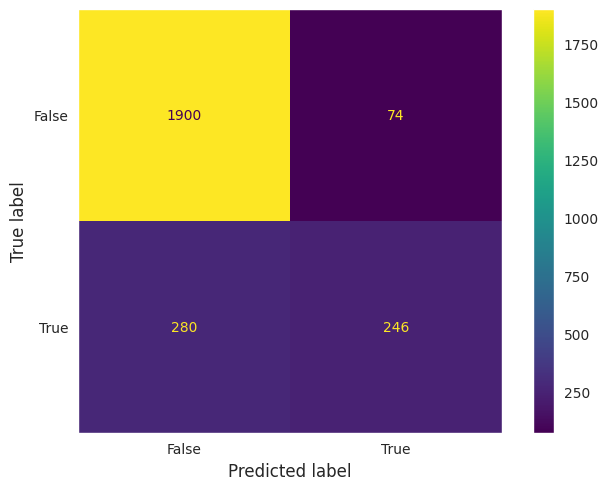

In [36]:
#Using Optuna for hyperparameter tuning for a GradientBoostingClassifier.
def objective2(trial,data=x_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15)
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators' : trial.suggest_categorical('n_estimators', [100, 500, 700, 1000]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'max_features': trial.suggest_categorical('max_features', [3, 5, 7, 9, 11]),
        
        'validation_fraction': 0.15,
        'n_iter_no_change': 100
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model2 = GradientBoostingClassifier(**param)    
    model2.fit(train_x,train_y)    
    preds = model2.predict(test_x)    
    acc = metrics.accuracy_score(test_y, preds)
    
    return acc

study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=30)
print('Number of finished trials:', len(study2.trials))
print('Best trial:', study2.best_trial.params)

Best_trial2 = study2.best_trial.params
model2 =GradientBoostingClassifier(**Best_trial2)
model2.fit(x_train, y_train)


preds = model2.predict(x_test)    
acc = metrics.accuracy_score(y_test, preds)    
print(f'Test Accuracy of GBC model:{acc}')

#Appending lists.
model_name.append('GradientBoostingClassifier')
train_acc.append(metrics.accuracy_score(y_train, model2.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))

#Plotting the confusion matrix.
sns.set_style('dark')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True])
cm_display.plot()
plt.show()

In [37]:
#Dataframe of each trial and it's accuracy.
study2.trials_dataframe().head(5)

number     value             datetime_start          datetime_complete  \
0       0  0.849778 2024-05-28 03:43:54.701903 2024-05-28 03:43:59.512813   
1       1  0.864889 2024-05-28 03:43:59.513069 2024-05-28 03:44:13.047397   
2       2  0.858667 2024-05-28 03:44:13.047658 2024-05-28 03:44:14.910427   
3       3  0.862222 2024-05-28 03:44:14.910699 2024-05-28 03:44:24.114625   
4       4  0.864889 2024-05-28 03:44:24.114904 2024-05-28 03:44:29.535774   

                duration  params_learning_rate  params_max_depth  \
0 0 days 00:00:04.810910                 0.012                13   
1 0 days 00:00:13.534328                 0.010                13   
2 0 days 00:00:01.862769                 0.016                 5   
3 0 days 00:00:09.203926                 0.016                13   
4 0 days 00:00:05.420870                 0.018                11   

   params_max_features  params_n_estimators  params_subsample     state  
0                    3                  100               0.7  COMPLETE  
1                    5                  500               0.8  COMPLETE  
2                    3                  500               0.4  COMPLETE  
3                    3                  700               0.7  COMPLETE  
4                    7                  500               0.7  COMPLETE

<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

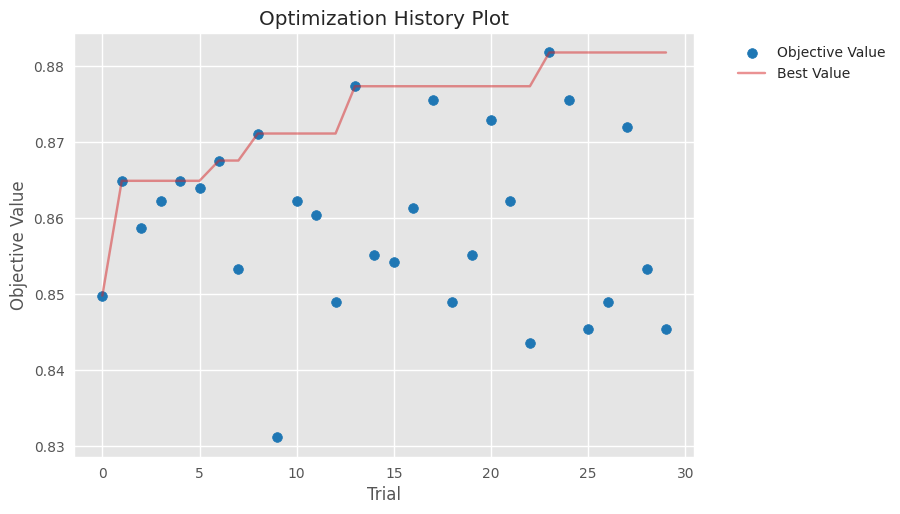

In [38]:
#Plotting optimization history of all trials in study0.
optuna.visualization.matplotlib.plot_optimization_history(study2)

In [39]:
#Plotting the high-dimensional parameter relationships in study0.
optuna.visualization.plot_parallel_coordinate(study2)

In [40]:
#plot_slice: shows the evolution of the search. You can see where in the hyperparameter space the search went and which parts of the space were explored more.
optuna.visualization.plot_slice(study2)

In [41]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study2, params=['learning_rate', 'n_estimators', 'subsample', 'max_depth', 'max_features'])

In [42]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study2)

In [43]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study2)

### Finding Best Parameters for LightGBMClassifier using Optuna.
<hr style="height:1px;border-top:1px solid #f00" />

A new objective function is defined to find best parameters for a Light GB Classifier.

[LightGBM] [Warning] bagging_fraction is set=0.1515185407560609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1515185407560609
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.27691022135801985, subsample=0.6 will be ignored. Current value: bagging_fraction=0.27691022135801985
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.15382092449970267, subsample=0.7 will be ignored. Current value: bagging_fraction=0.15382092449970267
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.25900313199813585, subsample=0.6 will be ignored. Current value: bagging_fraction=0.25900313199813585
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Curr

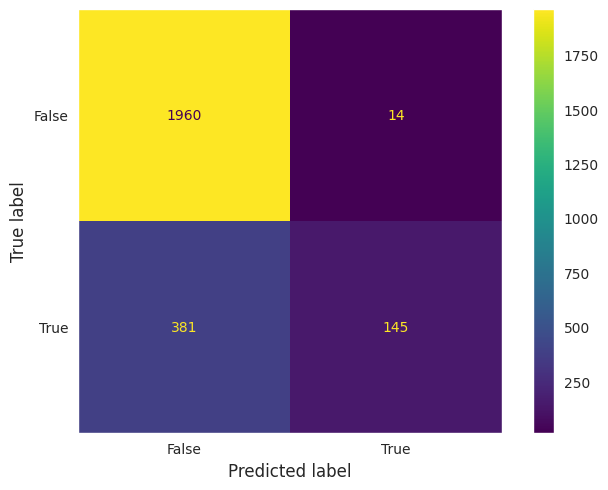

In [44]:
#Using Optuna for hyperparameter tuning for a Light GBMlassifier.
def objective3(trial,data=x_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15)
    param = {
        
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'rf']),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators' : trial.suggest_categorical('n_estimators', [100, 500, 700, 1000]),
        'objective' : 'binary',
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        "metric": "binary_logloss",
        
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0,log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0,log=True),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 0.3),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'is_unbalance':True,
        'n_jobs':-1
    }
    model3 = LGBMClassifier(**param)    
    model3.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)    
    preds = model3.predict(test_x)    
    acc = metrics.accuracy_score(test_y, preds)
    
    return acc

study3 = optuna.create_study(direction='maximize')
study3.optimize(objective3, n_trials=30)
print('Number of finished trials:', len(study3.trials))
print('Best trial:', study3.best_trial.params)


Best_trial3 = study3.best_trial.params
model3 =LGBMClassifier(**Best_trial3)
model3.fit(x_train, y_train)


preds = model3.predict(x_test)    
acc = metrics.accuracy_score(y_test, preds)    
print(f'Test Accuracy of LGBM model:{acc}')

#Appending lists.
model_name.append('LGBMClassifier')
train_acc.append(metrics.accuracy_score(y_train, model3.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))

#Plotting the confusion matrix.
sns.set_style('dark')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True])
cm_display.plot()
plt.show()

In [45]:
#Dataframe of each trial and it's accuracy.
study3.trials_dataframe().head(5)

number     value             datetime_start          datetime_complete  \
0       0  0.790222 2024-05-28 03:48:29.792984 2024-05-28 03:48:29.871517   
1       1  0.834667 2024-05-28 03:48:29.871936 2024-05-28 03:48:30.027527   
2       2  0.797333 2024-05-28 03:48:30.028023 2024-05-28 03:48:30.076328   
3       3  0.783111 2024-05-28 03:48:30.076727 2024-05-28 03:48:30.171300   
4       4  0.794667 2024-05-28 03:48:30.171720 2024-05-28 03:48:30.214392   

                duration  params_bagging_fraction  params_bagging_freq  \
0 0 days 00:00:00.078533                 0.151519                    5   
1 0 days 00:00:00.155591                 0.276910                    1   
2 0 days 00:00:00.048305                 0.153821                    2   
3 0 days 00:00:00.094573                 0.259003                    7   
4 0 days 00:00:00.042672                 0.184300                    7   

  params_boosting_type  params_colsample_bytree  params_learning_rate  \
0                 gbdt                      0.6                 0.018   
1                 gbdt                      0.9                 0.018   
2                 gbdt                      0.7                 0.016   
3                 gbdt                      1.0                 0.008   
4                   rf                      0.7                 0.008   

   params_max_depth  params_min_child_samples  params_min_child_weight  \
0                13                        82                      168   
1                11                        46                        1   
2                 5                        11                      147   
3                 7                        89                       97   
4                17                        26                      171   

   params_n_estimators  params_reg_alpha  params_reg_lambda  params_subsample  \
0                  100          1.264756           0.297430               1.0   
1                  100          0.002165           1.488182               0.6   
2                  500          0.030166           0.023200               0.7   
3                  500          0.352762           0.011572               0.6   
4                  100          0.066146           0.034969               0.8   

      state  
0  COMPLETE  
1  COMPLETE  
2  COMPLETE  
3  COMPLETE  
4  COMPLETE

<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

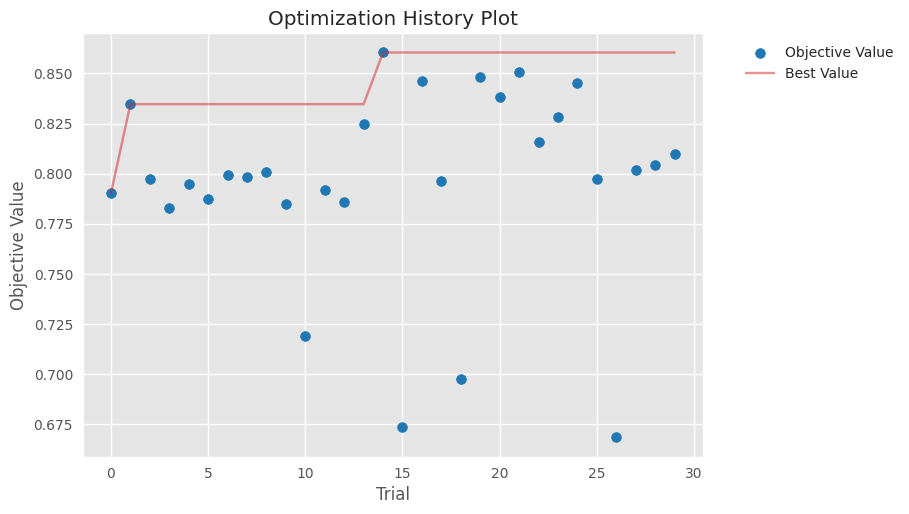

In [46]:
#Plotting optimization history of all trials in study0.
optuna.visualization.matplotlib.plot_optimization_history(study3)

In [47]:
#Plotting the high-dimensional parameter relationships in study0.
optuna.visualization.plot_parallel_coordinate(study3)

In [48]:
#plot_slice: shows the evolution of the search. You can see where in the hyperparameter space the search went and which parts of the space were explored more.
optuna.visualization.plot_slice(study3)

In [49]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study3, params=['boosting_type', 'max_depth', 'learning_rate', 'n_estimators', 'subsample', 'colsample_bytree', 'min_child_weight', 'reg_lambda', 'reg_alpha', 'bagging_fraction', 'bagging_freq', 'min_child_samples'])

In [50]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study3)

In [51]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study3)

The above models are fed to a Stacking Classifier that uses Logistic Regression as the final estimator.

In [52]:
#Defining a listof estimators.
estimators=[('RFC',model0), ('XGBC',model1), ('GBC', model2), ('LGBMC', model3)]

In [53]:
#Using Stacking Classifier.
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(estimators=estimators, final_estimator = lr)
clf_stack

StackingClassifier(estimators=[('RFC',
                                RandomForestClassifier(max_depth=15,
                                                       min_samples_leaf=3,
                                                       min_samples_split=10,
                                                       n_estimators=788)),
                               ('XGBC',
                                XGBClassifier(alpha=0.15446649300046397,
                                              base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=F...
                                GradientBoostingClassifier(learning_rate=0.008,
                                                           max_depth=7,
                                                           max_features=11,
                                                           n_estimators=700,
                                                           subsample=0.6)),
                               ('LGBMC',
                                LGBMClassifier(bagging_fraction=0.2571766516260545,
                                               bagging_freq=1,
                                               colsample_bytree=0.8,
                                               learning_rate=0.014, max_depth=9,
                                               min_child_samples=74,
                                               min_child_weight=1,
                                               reg_alpha=0.014232751532500866,
                                               reg_lambda=0.31167835236451563))],
                   final_estimator=LogisticRegression())

[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

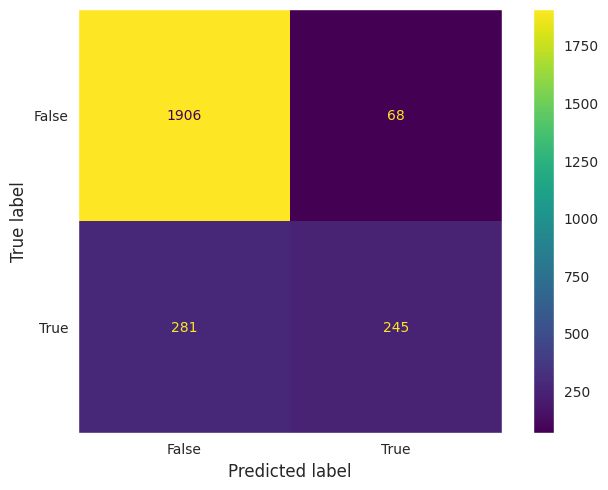

In [54]:
#Training stacked model.

model_stack = clf_stack.fit(x_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(x_test) 

acc_stack = metrics.accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

model_name.append('StackingClassifier')
train_acc.append(metrics.accuracy_score(y_train, model_stack.predict(x_train)))
test_acc.append(acc_stack)
precision.append(metrics.precision_score(y_test, model_stack.predict(x_test)))
recall.append(metrics.recall_score(y_test, model_stack.predict(x_test)))
f1.append(metrics.f1_score(y_test, model_stack.predict(x_test)))

#Plotting the confusion matrix.
sns.set_style('dark')
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, pred_stack), display_labels = [False, True]).plot()

We now try using the Voting Classifier based on the above models.

[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

 accuracy score of Hard Voting model: 85.04 

[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

 accuracy score of Soft Voting model: 85.72


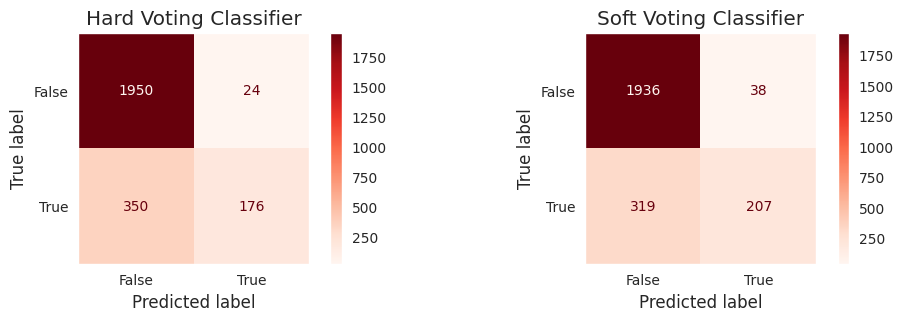

In [55]:
#Creating Hard Voting model.
clf_voting_h = VotingClassifier(estimators=estimators, voting='hard')
model_voting_h=clf_voting_h.fit(x_train, y_train)
pred_voting_h= model_voting_h.predict(x_test)

acc_voting_h = metrics.accuracy_score(y_test, pred_voting_h)  # evaluating accuracy
print('\n accuracy score of Hard Voting model:', acc_voting_h * 100 ,'\n')

model_name.append('Hard_Voting_Classifier')
train_acc.append(metrics.accuracy_score(y_train, model_voting_h.predict(x_train)))
test_acc.append(acc_voting_h)
precision.append(metrics.precision_score(y_test, model_voting_h.predict(x_test)))
recall.append(metrics.recall_score(y_test, model_voting_h.predict(x_test)))
f1.append(metrics.f1_score(y_test, model_voting_h.predict(x_test)))

#Plotting the confusion matrix.
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
cmap="Reds"

axes[0].set_title("Hard Voting Classifier")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, pred_voting_h), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0])


#Creating Soft Voting model.
clf_voting_s = VotingClassifier(estimators=estimators, voting='soft')
model_voting_s=clf_voting_s.fit(x_train, y_train)
pred_voting_s= model_voting_s.predict(x_test)

acc_voting_s = metrics.accuracy_score(y_test, pred_voting_s)  # evaluating accuracy
print('\n accuracy score of Soft Voting model:', acc_voting_s * 100)

model_name.append('Soft_Voting_Classifier')
train_acc.append(metrics.accuracy_score(y_train, model_voting_s.predict(x_train)))
test_acc.append(acc_voting_s)
precision.append(metrics.precision_score(y_test, model_voting_s.predict(x_test)))
recall.append(metrics.recall_score(y_test, model_voting_s.predict(x_test)))
f1.append(metrics.f1_score(y_test, model_voting_s.predict(x_test)))

#Plotting the confusion matrix.
axes[1].set_title("Soft Voting Classifier")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, pred_voting_s), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1])

### Oversampling the training data:
We now using various oversampling techniques in an effort to increase the accuracy of the test data. Note that we oversample the training data only to ensure integrity of the test data.

### Using various Oversampling techniques for RandomForestClassifier.
<hr style="height:1px;border-top:1px solid #f00" />

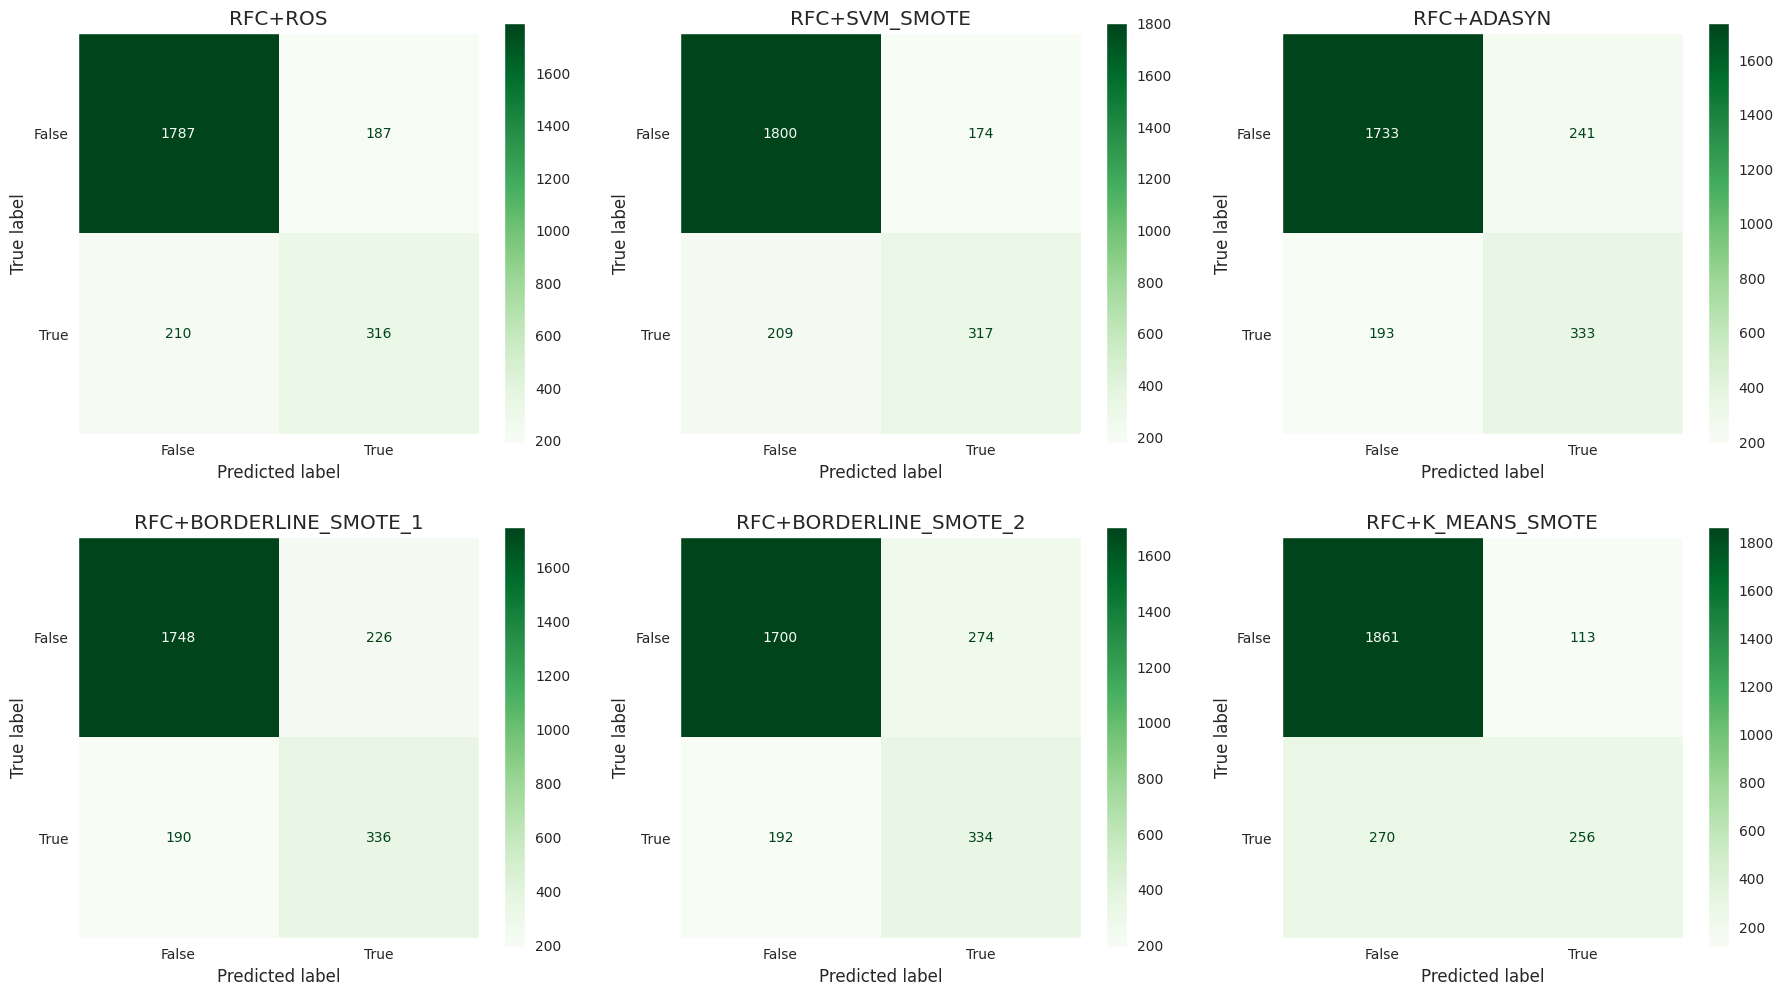

In [56]:
# Resampling using RandomOverSampler and fitting the data.
x_train_ROS, y_train_ROS = RandomOverSampler().fit_resample(x_train, y_train)
clf_RFC =RandomForestClassifier(**Best_trial0)
clf_RFC.fit(x_train_ROS, y_train_ROS)
preds = clf_RFC.predict(x_test)
#Appending lists.
model_name.append('RFC+ROS')
train_acc.append(metrics.accuracy_score(y_train, clf_RFC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
cmap="Greens"
axes[0,0].set_title("RFC+ROS")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,0])


# Resampling using SVMSMOTE and fitting the data.
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE().fit_resample(x_train, y_train)
clf_RFC.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
preds = clf_RFC.predict(x_test)
#Appending lists.
model_name.append('RFC+SVMSMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_RFC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,1].set_title("RFC+SVM_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap,ax=axes[0,1])


# Resampling using ADASYN and fitting the data.
x_train_ADASYN, y_train_ADASYN = ADASYN().fit_resample(x_train, y_train)
clf_RFC.fit(x_train_ADASYN, y_train_ADASYN)
preds = clf_RFC.predict(x_test)
#Appending lists.
model_name.append('RFC+ADASYN')
train_acc.append(metrics.accuracy_score(y_train, clf_RFC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,2].set_title("RFC+ADASYN")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,2])

# Resampling using Borderline Smote of type 1 and fitting the data.
x_train_BSMOTE1, y_train_BSMOTE1 = BorderlineSMOTE(kind='borderline-1').fit_resample(x_train, y_train)
clf_RFC.fit(x_train_BSMOTE1, y_train_BSMOTE1)
preds = clf_RFC.predict(x_test)
#Appending lists.
model_name.append('RFC+BORDERLINE_SMOTE_1')
train_acc.append(metrics.accuracy_score(y_train, clf_RFC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,0].set_title("RFC+BORDERLINE_SMOTE_1")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,0])

# Resampling using Borderline Smote of type 2 and fitting the data.
x_train_BSMOTE2, y_train_BSMOTE2 = BorderlineSMOTE(kind='borderline-2').fit_resample(x_train, y_train)
clf_RFC.fit(x_train_BSMOTE2, y_train_BSMOTE2)
preds = clf_RFC.predict(x_test)
#Appending lists.
model_name.append('RFC+BORDERLINE_SMOTE_2')
train_acc.append(metrics.accuracy_score(y_train, clf_RFC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,1].set_title("RFC+BORDERLINE_SMOTE_2")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,1])

# Resampling using K Means SMOTE and fitting the data.
x_train_KMSMOTE, y_train_KMSMOTE =KMeansSMOTE(cluster_balance_threshold=0.2).fit_resample(x_train, y_train)
clf_RFC.fit(x_train_KMSMOTE, y_train_KMSMOTE)
preds = clf_RFC.predict(x_test)
#Appending lists.
model_name.append('RFC+K_MEANS_SMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_RFC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,2].set_title("RFC+K_MEANS_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,2])

### Using various Oversampling techniques for XGBClassifier.
<hr style="height:1px;border-top:1px solid #f00" />

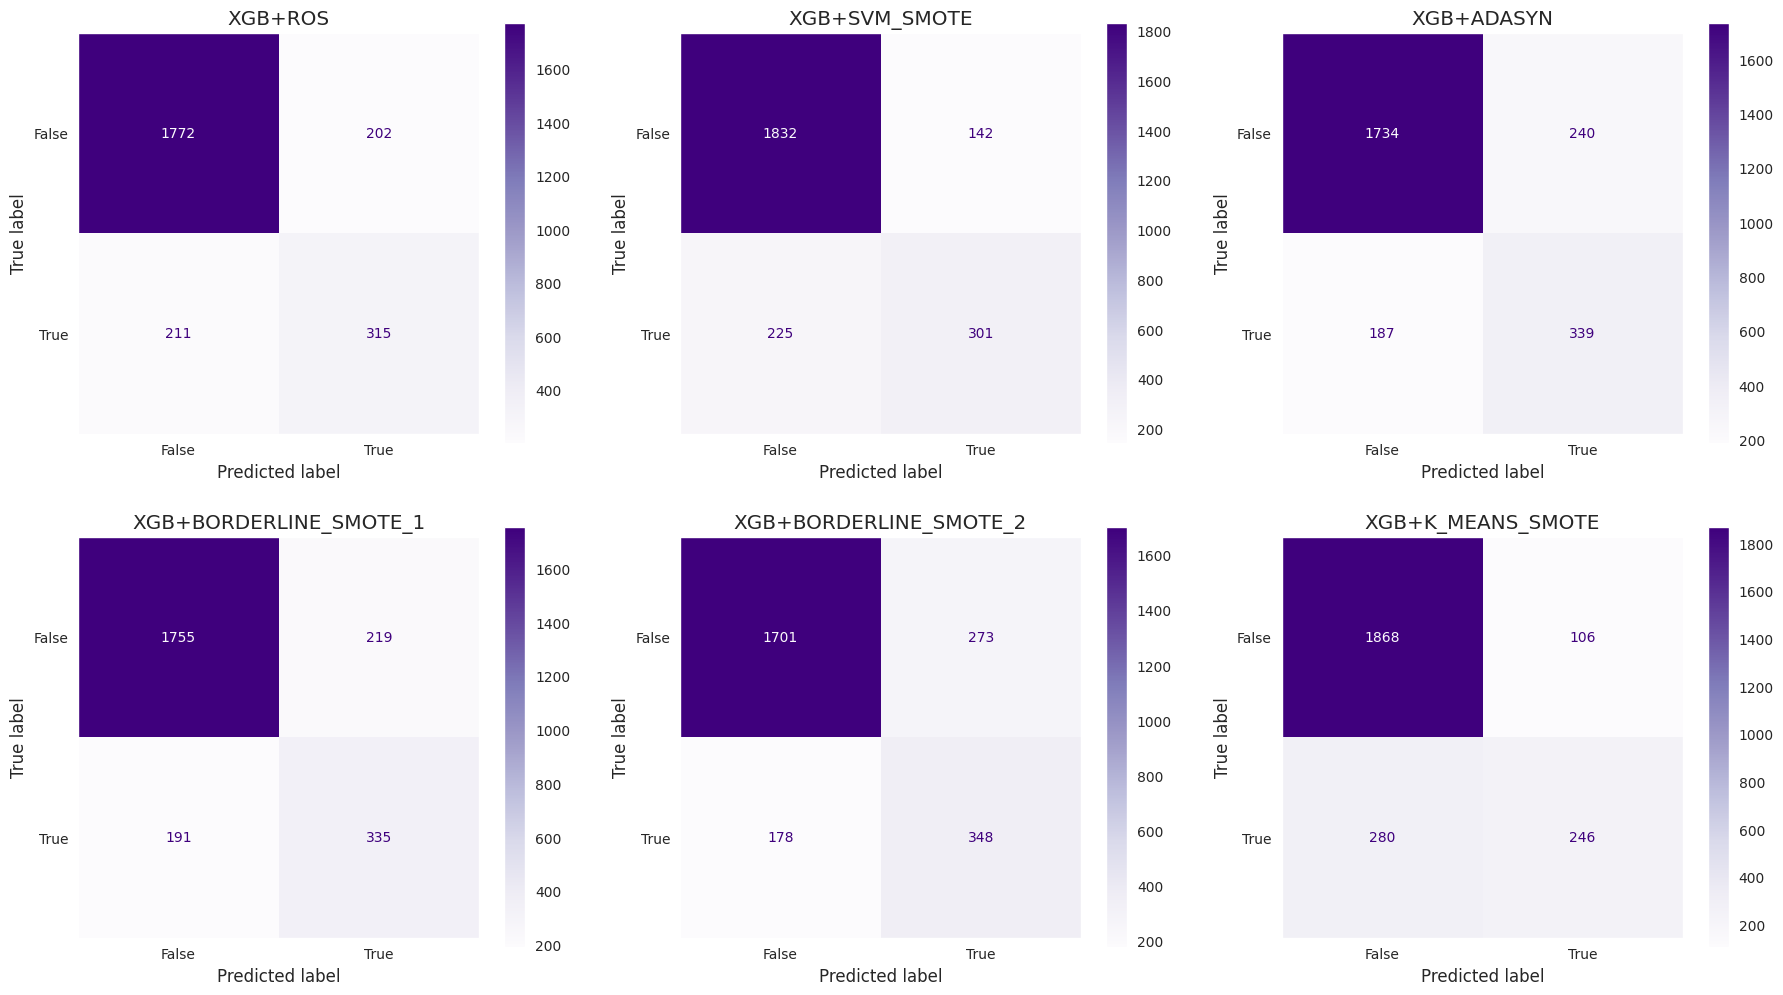

In [57]:
clf_XGB =XGBClassifier(**Best_trial1)

#Random Oversampling trials and appending accuracy values in lists.
x_train_ROS, y_train_ROS = RandomOverSampler().fit_resample(x_train, y_train)
clf_XGB.fit(x_train_ROS, y_train_ROS)
preds = clf_XGB.predict(x_test)
#Appending lists.
model_name.append('XGB+ROS')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
cmap="Purples"
axes[0,0].set_title("XGB+ROS")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,0])

#Oversampling trials usiang SVMSMOTE and appending accuracy values in lists.
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE().fit_resample(x_train, y_train)
clf_XGB.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
preds = clf_XGB.predict(x_test)
#Appending lists.
model_name.append('XGB+SVMSMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,1].set_title("XGB+SVM_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,1])

#Oversampling trials using ADASYN and appending accuracy values in lists.
x_train_ADASYN, y_train_ADASYN = ADASYN().fit_resample(x_train, y_train)
clf_XGB.fit(x_train_ADASYN, y_train_ADASYN)
preds = clf_XGB.predict(x_test)
#Appending lists.
model_name.append('XGB+ADASYN')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,2].set_title("XGB+ADASYN")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,2])

#Oversampling trials using Borderline SMOTE of type 1 and appending accuracy values in lists.
x_train_BSMOTE1, y_train_BSMOTE1 = BorderlineSMOTE(kind='borderline-1').fit_resample(x_train, y_train)
clf_XGB.fit(x_train_BSMOTE1, y_train_BSMOTE1)
preds = clf_XGB.predict(x_test)
#Appending lists.
model_name.append('XGB+BORDERLINE_SMOTE_1')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,0].set_title("XGB+BORDERLINE_SMOTE_1")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,0])


#Oversampling trials using Borderline SMOTE of type 2 and appending accuracy values in lists.
x_train_BSMOTE2, y_train_BSMOTE2 = BorderlineSMOTE(kind='borderline-2').fit_resample(x_train, y_train)
clf_XGB.fit(x_train_BSMOTE2, y_train_BSMOTE2)
preds = clf_XGB.predict(x_test)
#Appending lists.
model_name.append('XGB+BORDERLINE_SMOTE_2')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,1].set_title("XGB+BORDERLINE_SMOTE_2")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,1])

#Oversampling trials using K Means SMOTE of type 2 and appending accuracy values in lists.
x_train_KMSMOTE, y_train_KMSMOTE =KMeansSMOTE(cluster_balance_threshold=0.2).fit_resample(x_train, y_train)
clf_XGB.fit(x_train_KMSMOTE, y_train_KMSMOTE)
preds = clf_XGB.predict(x_test)
#Appending lists.
model_name.append('XGB+K_MEANS_SMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,2].set_title("XGB+K_MEANS_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,2])

### Using various Oversampling techniques for Gradient Boosting Classifier.
<hr style="height:1px;border-top:1px solid #f00" />

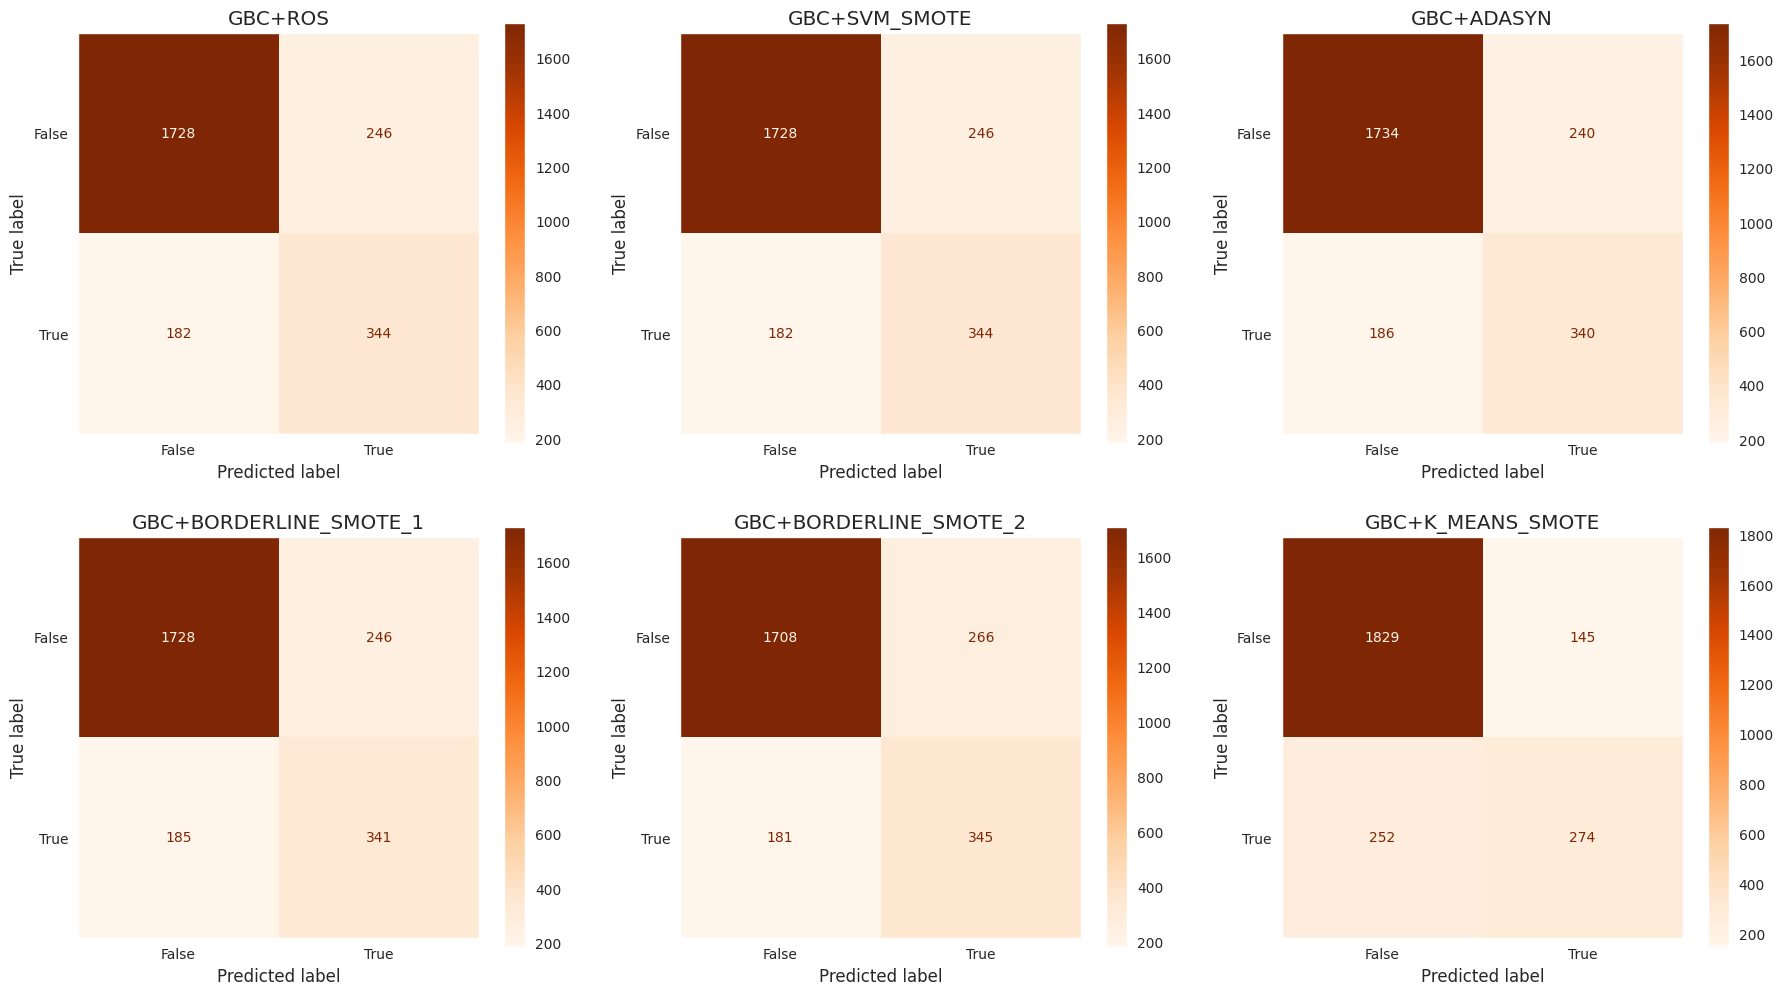

In [58]:
clf_GBC =GradientBoostingClassifier(**Best_trial2)

#Random Oversampling trials and appending accuracy values in lists.
x_train_ROS, y_train_ROS = RandomOverSampler().fit_resample(x_train, y_train)
clf_GBC.fit(x_train_ROS, y_train_ROS)
preds = clf_GBC.predict(x_test)
#Appending lists.
model_name.append('GBC+ROS')
train_acc.append(metrics.accuracy_score(y_train, clf_GBC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
cmap="Oranges"
axes[0,0].set_title("GBC+ROS")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,0])

#Oversampling trials usiang SVMSMOTE and appending accuracy values in lists.
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE().fit_resample(x_train, y_train)
clf_XGB.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
preds = clf_GBC.predict(x_test)
#Appending lists.
model_name.append('GBC+SVMSMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_GBC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,1].set_title("GBC+SVM_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,1])

#Oversampling trials using ADASYN and appending accuracy values in lists.
x_train_ADASYN, y_train_ADASYN = ADASYN().fit_resample(x_train, y_train)
clf_GBC.fit(x_train_ADASYN, y_train_ADASYN)
preds = clf_GBC.predict(x_test)
#Appending lists.
model_name.append('GBC+ADASYN')
train_acc.append(metrics.accuracy_score(y_train, clf_GBC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,2].set_title("GBC+ADASYN")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,2])


#Oversampling trials using Borderline SMOTE of type 1 and appending accuracy values in lists.
x_train_BSMOTE1, y_train_BSMOTE1 = BorderlineSMOTE(kind='borderline-1').fit_resample(x_train, y_train)
clf_GBC.fit(x_train_BSMOTE1, y_train_BSMOTE1)
preds = clf_GBC.predict(x_test)
#Appending lists.
model_name.append('GBC+BORDERLINE_SMOTE_1')
train_acc.append(metrics.accuracy_score(y_train, clf_XGB.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,0].set_title("GBC+BORDERLINE_SMOTE_1")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,0])


#Oversampling trials using Borderline SMOTE of type 2 and appending accuracy values in lists.
x_train_BSMOTE2, y_train_BSMOTE2 = BorderlineSMOTE(kind='borderline-2').fit_resample(x_train, y_train)
clf_GBC.fit(x_train_BSMOTE2, y_train_BSMOTE2)
preds = clf_GBC.predict(x_test)
#Appending lists.
model_name.append('GBC+BORDERLINE_SMOTE_2')
train_acc.append(metrics.accuracy_score(y_train, clf_GBC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,1].set_title("GBC+BORDERLINE_SMOTE_2")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,1])

#Oversampling trials using K Means SMOTE of type 2 and appending accuracy values in lists.
x_train_KMSMOTE, y_train_KMSMOTE =KMeansSMOTE(cluster_balance_threshold=0.2).fit_resample(x_train, y_train)
clf_GBC.fit(x_train_KMSMOTE, y_train_KMSMOTE)
preds = clf_GBC.predict(x_test)
#Appending lists.
model_name.append('GBC+K_MEANS_SMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_GBC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,2].set_title("GBC+K_MEANS_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,2])


### Using various Oversampling techniques for LGBMClassifier.
<hr style="height:1px;border-top:1px solid #f00" />

[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2571766516260545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2571766516260545
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

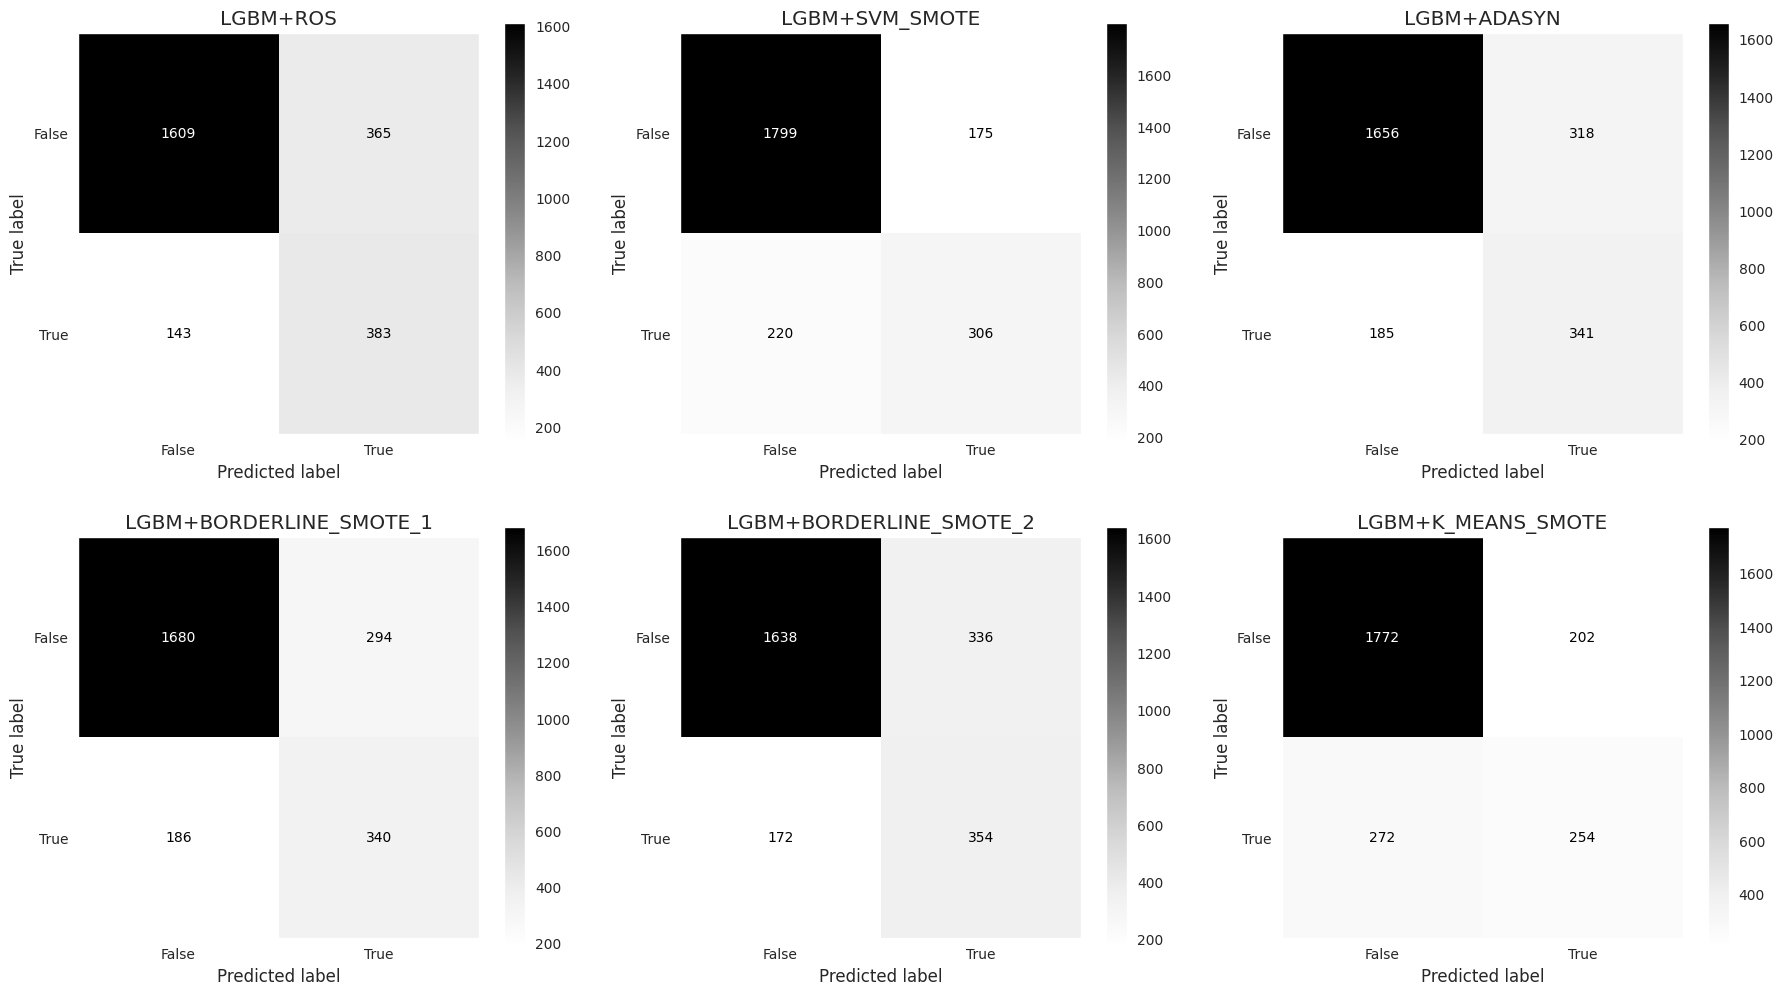

In [59]:
clf_LGBM =LGBMClassifier(**Best_trial3)

#Random Oversampling trials and appending accuracy values in lists.
x_train_ROS, y_train_ROS = RandomOverSampler().fit_resample(x_train, y_train)
clf_LGBM.fit(x_train_ROS, y_train_ROS)
preds = clf_LGBM.predict(x_test)
#Appending lists.
model_name.append('LGBM+ROS')
train_acc.append(metrics.accuracy_score(y_train, clf_LGBM.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
cmap="Greys"
axes[0,0].set_title("LGBM+ROS")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,0])


#Oversampling trials usiang SVMSMOTE and appending accuracy values in lists.
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE().fit_resample(x_train, y_train)
clf_LGBM.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
preds = clf_LGBM.predict(x_test)
#Appending lists.
model_name.append('LGBM+SVMSMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_LGBM.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,1].set_title("LGBM+SVM_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,1])


#Oversampling trials using ADASYN and appending accuracy values in lists.
x_train_ADASYN, y_train_ADASYN = ADASYN().fit_resample(x_train, y_train)
clf_LGBM.fit(x_train_ADASYN, y_train_ADASYN)
preds = clf_LGBM.predict(x_test)
#Appending lists.
model_name.append('LGBM+ADASYN')
train_acc.append(metrics.accuracy_score(y_train, clf_LGBM.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[0,2].set_title("LGBM+ADASYN")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[0,2])


#Oversampling trials using Borderline SMOTE of type 1 and appending accuracy values in lists.
x_train_BSMOTE1, y_train_BSMOTE1 = BorderlineSMOTE(kind='borderline-1').fit_resample(x_train, y_train)
clf_LGBM.fit(x_train_BSMOTE1, y_train_BSMOTE1)
preds = clf_LGBM.predict(x_test)
#Appending lists.
model_name.append('LGBM+BORDERLINE_SMOTE_1')
train_acc.append(metrics.accuracy_score(y_train, clf_LGBM.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,0].set_title("LGBM+BORDERLINE_SMOTE_1")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,0])

#Oversampling trials using Borderline SMOTE of type 2 and appending accuracy values in lists.
x_train_BSMOTE2, y_train_BSMOTE2 = BorderlineSMOTE(kind='borderline-2').fit_resample(x_train, y_train)
clf_LGBM.fit(x_train_BSMOTE2, y_train_BSMOTE2)
preds = clf_LGBM.predict(x_test)
#Appending lists.
model_name.append('LGBM+BORDERLINE_SMOTE_2')
train_acc.append(metrics.accuracy_score(y_train, clf_LGBM.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,1].set_title("LGBM+BORDERLINE_SMOTE_2")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,1])


#Oversampling trials using K Means SMOTE of type 2 and appending accuracy values in lists.
x_train_KMSMOTE, y_train_KMSMOTE =KMeansSMOTE(cluster_balance_threshold=0.2).fit_resample(x_train, y_train)
clf_LGBM.fit(x_train_KMSMOTE, y_train_KMSMOTE)
preds = clf_LGBM.predict(x_test)
#Appending lists.
model_name.append('LGBM+K_MEANS_SMOTE')
train_acc.append(metrics.accuracy_score(y_train, clf_GBC.predict(x_train)))
test_acc.append(metrics.accuracy_score(y_test, preds))
precision.append(metrics.precision_score(y_test, preds))
recall.append(metrics.recall_score(y_test, preds))
f1.append(metrics.f1_score(y_test, preds))
#Plotting the confusion matricesfor each sampling technique.
axes[1,2].set_title("LGBM+K_MEANS_SMOTE")
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, preds), display_labels = [False, True]).plot(cmap=cmap, ax=axes[1,2])


In [60]:
#Creating dictionary of all the models and their corresponding sccuracies, and transforming it to a dataframe.
dict = {'Model Name': model_name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'Precision': precision, 'Recall': recall, 'F1-score':f1}
model_df = pd.DataFrame(dict)  
model_df.style.background_gradient()

The test accuracy of the Stacking Classifier is highest among others. It is also evident that oversampling training data does not provide increased accuracy over the original data. That's because this technique puts more weight to the small class, makes the model bias to it. The model will now predict the small class with higher accuracy but the overall accuracy will decrease.

We now look at other metrics of classification using model_stack predictions.

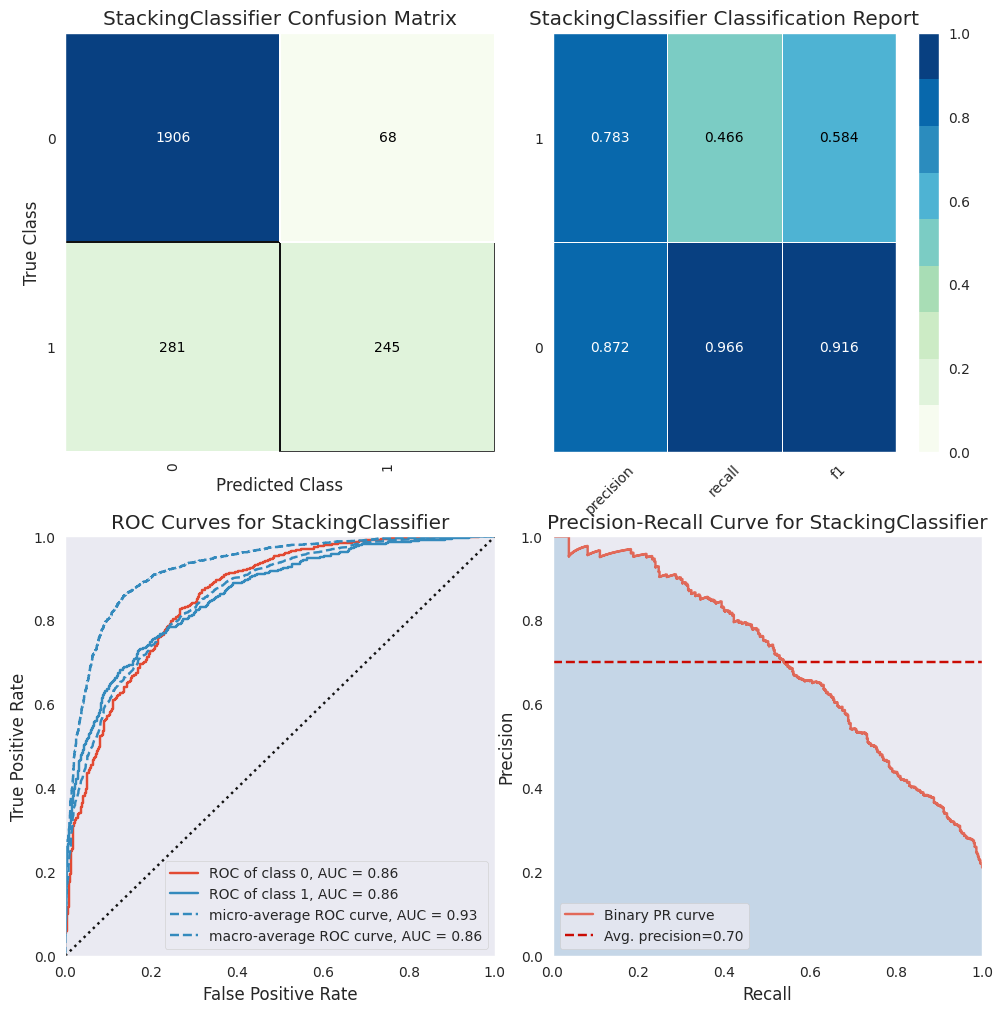

In [61]:
#Performance metrics plots of the final stacked model.

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

model = model_stack
visualgrid = [
    ConfusionMatrix(model_stack, ax=axes[0][0], cmap= 'GnBu'),
    ClassificationReport(model_stack, ax=axes[0][1], cmap= 'GnBu'),
    ROCAUC(model_stack, ax=axes[1][0]),
    PrecisionRecallCurve(model_stack, ax=axes[1][1])
]

for viz in visualgrid:
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.finalize()

plt.show()